<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/Session-9/Session-9/Assignment-9/EVA4_Quiz_9_Praveen_Raghuvanshi_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
x = datetime.datetime.now()
print(x)

2020-04-04 17:15:09.769370


## Steps Summary

In [0]:
# 1. Mount google drive
# 2. Set the directory path of google drive
# 3. Import all modules and libraries
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test

### 1. Mount google drive

In [3]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Set the directory path of google drive

In [0]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('/content/drive/My Drive/eva-4/assignment-9')
sys.path.append('/content/drive/My Drive/eva-4/assignment-9/models')

In [5]:
cd '/content/drive/My Drive/eva-4/assignment-9'

/content/drive/My Drive/eva-4/assignment-9


In [6]:
ls

augmentation.py  gradcam/  outputs/      S9_functions.py  utils.py
data/            models/   __pycache__/  sampleimages/


### 3. Import all modules and libraries

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
from torchvision.utils import make_grid

### 4. Set Device

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


###  5. Import all the functions

In [0]:
from model import Net, ResNet, resnet18
from QuizDNN import QuizDNN
from S9_functions import myfunc, transformations, loadcifar10dataset, getclasses, display, train, test, imshow, getoptimizer

###  6. Load Transformations

In [10]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-ioswzcyl
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-ioswzcyl
     |████████████████████████████████| 634kB 14.0MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=cf4bddd60052526012b7366499db76ead29ba8aad32b3b2d7e611cbde84f1b06
  Stored in directory: /tmp/pip-ephem-wheel-cache-557o1fhg/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=ab045d83e70c5d3e8ab5d247c6a12259d5d78c4f921575dfc8b9e9c4013c8a6d
  Stored in directory: /tmp/pip-ephem-wheel-cache-557o1fhg/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albu

In [0]:
transform_train, transform_test = transformations()

###  7. Load Dataset

In [11]:
trainset, trainloader, testset, testloader = loadcifar10dataset(transform_train, transform_test)
print(trainloader)

Files already downloaded and verified
Files already downloaded and verified


###  8. Load Classes

In [12]:
classes = getclasses()
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### 9. Display sample images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck   cat  frog  ship


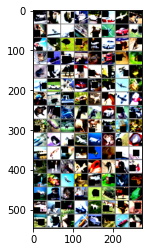

In [13]:
display(4, trainloader, classes)

### 10. Load QuizDNN Model


In [14]:
print("Building Model")
net = QuizDNN()

Building Model


In [15]:
# Display Model Summary
!pip install torchsummary
from torchsummary import summary

model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           5,472
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 51, 16, 16]               0
           Conv2d-10            [-1, 8, 18, 18]             408
             ReLU-11            [-1, 8, 18, 18]               0
      BatchNorm2d-12            [-1, 8, 18, 18]              16
          Dropout-13            [-1, 8, 18, 18]               0
           Conv2d-14           [-1, 16,

### 11. Define loss function and optimizer


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = getoptimizer(net)

### 12. Run Train and Test

In [17]:
for epoch in range(40):
    train(net, trainloader, device, optimizer, criterion, epoch)
    test(net, testloader, device, criterion, epoch)

print("Training completed")


Epoch: 0
 [================================================================>]  Step: 22ms | Tot: 19s679ms | Train >> Loss: 1.707 | Acc: 37.292% (18646/50000) 391/391 
 [================================================================>]  Step: 8ms | Tot: 2s188ms | Test >> Loss: 1.376 | Acc: 49.490% (4949/10000) 79/79 

Epoch: 1
 [================================================================>]  Step: 25ms | Tot: 19s847ms | Train >> Loss: 1.438 | Acc: 47.774% (23887/50000) 391/391 
 [================================================================>]  Step: 9ms | Tot: 2s220ms | Test >> Loss: 1.230 | Acc: 55.250% (5525/10000) 79/79 

Epoch: 2
 [================================================================>]  Step: 23ms | Tot: 19s881ms | Train >> Loss: 1.318 | Acc: 52.234% (26117/50000) 391/391 
 [================================================================>]  Step: 8ms | Tot: 2s147ms | Test >> Loss: 1.190 | Acc: 56.820% (5682/10000) 79/79 

Epoch: 3
 [============================